# 0.分析準備

## 0.1 環境建置

In [2]:
# 導入所需套件
import pandas as pd                 # 數據處理和分析
import numpy as np                  # 數值運算
import matplotlib.pyplot as plt     # 基礎繪圖
import seaborn as sns               # 進階繪圖，基於 matplotlib
from scipy import stats             # 用於統計檢定
import warnings                     # 用於處理警告訊息
from tabulate import tabulate

In [3]:
# 忽略警告訊息，讓 Notebook 輸出更簡潔
warnings.filterwarnings('ignore')

# 設定 Matplotlib 顯示中文 (如果你的系統需要)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei', 'SimHei'] # 替換為你的中文字體
plt.rcParams['axes.unicode_minus'] = False # 解決負號顯示問題

## 0.2 分析資料

In [28]:
# 定義數據檔案路徑
data_path = '../data/train.csv' # data path

# 載入資料集
try:
    df = pd.read_csv(data_path)
    print("資料載入成功！")
    print("data source: https://www.kaggle.com/competitions/titanic/data?select=test.csv")
    print(f"資料集包含 {df.shape[0]} 行和 {df.shape[1]} 列。")
except FileNotFoundError:
    print(f"錯誤：找不到數據檔案。請確認 '{data_path}' 路徑正確。")
    print("請將 'train.csv' 放到 projects/EDA_Titanic_Survival_Analysis/data/ 資料夾中。")

資料載入成功！
data source: https://www.kaggle.com/competitions/titanic/data?select=test.csv
資料集包含 891 行和 12 列。


### 0.2.2 資料基本型態與特性

In [ ]:
# 建立一個 DataFrame 來儲存變數的說明 (中文變數名稱、英文變數名稱、定義、鍵值)
variable_definitions = {
    'Variable': ['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'],
    '變數說明': ['生還', '艙位等級', '性別', '年齡', '兄弟姊妹/配偶數', '父母/子女數', '船票號碼', '票價', '客艙號碼', '登船港口'],
    'Definition': ['Survival', 'Ticket class', 'Sex', 'Age in years', '# of siblings / spouses aboard the Titanic', '# of parents / children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number', 'Port of Embarkation'],
    'Key': ['0 = No, 1 = Yes', '1 = 1st, 2 = 2nd, 3 = 3rd', '', '', '', '', '', '', '', 'C = Cherbourg, Q = Queenstown, S = Southampton']
}

# 創建 DataFrame
variables_df = pd.DataFrame(variable_definitions)

# 輸出表格
print("--- 變數說明表 ---")
print(tabulate(variables_df, headers='keys', tablefmt='pretty', showindex=False))
print("------------ data source: ------------\n")
print("------------ 變數說明表 ------------\n")

# 前5行數據
print("資料集前5行：")
print(df.head())
print("------------ 資料集前5行 ------------\n")

# 資料集的基本資訊 (欄位、非空值數量、數據類型)
print("\n資料集的基本資訊：")
df.info()
print("------------ 資料集的基本資訊 ------------\n")

# 資料集的敘述性統計 (僅針對數值型變數欄位)
print("資料集描述性統計(僅針對數值型變數欄位)：")
print(tabulate(df.describe(), headers='keys', tablefmt='pretty', showindex=False))
print("\n資料集的欄位名稱：")
print(df.columns.tolist())
# print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))



--- 變數說明表 ---
+----------+-----------------+--------------------------------------------+------------------------------------------------+
| Variable |    變數說明     |                 Definition                 |                      Key                       |
+----------+-----------------+--------------------------------------------+------------------------------------------------+
| survival |      生還       |                  Survival                  |                0 = No, 1 = Yes                 |
|  pclass  |    艙位等級     |                Ticket class                |           1 = 1st, 2 = 2nd, 3 = 3rd            |
|   sex    |      性別       |                    Sex                     |                                                |
|   age    |      年齡       |                Age in years                |                                                |
|  sibsp   | 兄弟姊妹/配偶數 | # of siblings / spouses aboard the Titanic |                                                |
|  parc

# 1.資料清洗與前處理

## 1.1 缺失值處裡

In [6]:
print("--- 檢查缺失值 ---")
print(df.isnull().sum()) # 顯示每個欄位的缺失值數量
print("\n缺失值比例 (%):")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False)) # 顯示缺失值比例，並按缺失數量降序排列

--- 檢查缺失值 ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

缺失值比例 (%):
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
Sex             0.000000
Parch           0.000000
SibSp           0.000000
Fare            0.000000
Ticket          0.000000
dtype: float64


In [7]:
print("\n--- 處理 Cabin 欄位（缺失率過高，新增一布林值變數代表[有無客艙號資料]以取代該欄位） ---")

# --- 步驟 1: 檢查 Cabin 欄位是否存在，並基於它創建 Has_Cabin ---
if 'Cabin' in df.columns:
    # 創建一個新的特徵 'Has_Cabin'：1 = 有客艙號，0 = 沒有客艙號
    df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
    print("已創建 'Has_Cabin' 欄位")
    # 在丟棄原始欄位之前，先展示原始 Cabin 和新創建的 Has_Cabin 的對比，確認轉換是否正確
    print("原始欄位[Cabin]與新欄位[Has_Cabin]對比（前5行）：")
    print(tabulate(df[['Cabin', 'Has_Cabin']].head(), headers='keys', tablefmt='pretty'))
    # 丟棄原始的 Cabin 欄位
    df = df.drop('Cabin', axis=1)
    print("已創建 'Has_Cabin' 欄位並丟棄原始 'Cabin' 欄位。")
else:
    # 如果 Cabin 欄位已經不存在，但 Has_Cabin 可能還沒創建（例如首次運行或清除輸出後）
    # 檢查 Has_Cabin 是否存在，如果不存在則報錯或提示
    if 'Has_Cabin' not in df.columns:
        # 這種情況通常表示你可能跳過了創建步驟或重啟了Kernel但沒有重新載入數據
        print("\033[31m!警告：'Cabin' 欄位已不存在，且 'Has_Cabin' 欄位尚未創建。請確保數據已正確載入或重新執行所有上一步驟。!\033[0m")
        
    else:
        print("\033[33m!注意：'Cabin' 欄位已不存在，且 'Has_Cabin' 欄位已存在，無需重複操作。!\033[0m")

# --- 步驟 2: 檢查新欄位 'Has_Cabin' 的狀態 ---
# 無論 Cabin 是否存在，Has_Cabin 應該在第一次執行時被創建或跳過。
# 這裡我們只檢查 Has_Cabin 的狀態，確保它能被訪問。
if 'Has_Cabin' in df.columns:
    print("\n新 'Has_Cabin' 欄位（前5行）：")
    print(tabulate(df[['Has_Cabin']].head(), headers='keys', tablefmt='pretty'))

    print("\n'Has_Cabin' 欄位值分佈：")
    print(df['Has_Cabin'].value_counts())
    print(f"有客艙號資料的乘客比例：{df['Has_Cabin'].value_counts(normalize=True)[1]:.2%}")
else:
    print("\n'Has_Cabin' 欄位不存在，請檢查上述步驟。")



--- 處理 Cabin 欄位（缺失率過高，新增一布林值變數代表[有無客艙號資料]以取代該欄位） ---
已創建 'Has_Cabin' 欄位
原始欄位[Cabin]與新欄位[Has_Cabin]對比（前5行）：
+---+-------+-----------+
|   | Cabin | Has_Cabin |
+---+-------+-----------+
| 0 |  nan  |     0     |
| 1 |  C85  |     1     |
| 2 |  nan  |     0     |
| 3 | C123  |     1     |
| 4 |  nan  |     0     |
+---+-------+-----------+
已創建 'Has_Cabin' 欄位並丟棄原始 'Cabin' 欄位。

新 'Has_Cabin' 欄位（前5行）：
+---+-----------+
|   | Has_Cabin |
+---+-----------+
| 0 |     0     |
| 1 |     1     |
| 2 |     0     |
| 3 |     1     |
| 4 |     0     |
+---+-----------+

'Has_Cabin' 欄位值分佈：
Has_Cabin
0    687
1    204
Name: count, dtype: int64
有客艙號資料的乘客比例：22.90%



--- 處理 Age 欄位 ---
在填充缺失值前，先視覺化 `Age` 在不同 `Pclass` 和 `Sex` 組中的分佈：


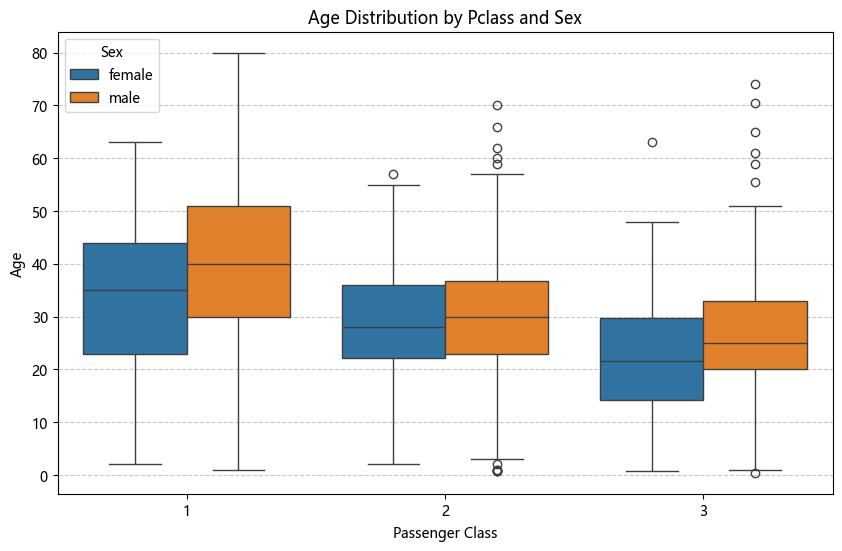

從上圖可見，不同艙位等級和性別的乘客，其年齡分佈確實存在差異。
例如，頭等艙（Pclass=1）的乘客普遍年齡較大，且男性與女性的年齡中位數也略有不同。
這支持我們採用分組中位數填充 `Age` 缺失值的策略。


In [8]:
print("\n--- 處理 Age 欄位 ---")
print("在填充缺失值前，先視覺化 `Age` 在不同 `Pclass` 和 `Sex` 組中的分佈：")

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title('Age Distribution by Pclass and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("從上圖可見，不同艙位等級和性別的乘客，其年齡分佈確實存在差異。")
print("例如，頭等艙（Pclass=1）的乘客普遍年齡較大，且男性與女性的年齡中位數也略有不同。")
print("這支持我們採用分組中位數填充 `Age` 缺失值的策略。")

In [9]:
# 填充 Age 的缺失值：按 Pclass 和 Sex 分組，用中位數填充
# transform 會將填充後的值返回，並保持原始 DataFrame 的索引對齊
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

print("\n`Age` 欄位已按 `Pclass` 和 `Sex` 分組的中位數填充缺失值。")
print(f"再次檢查 `Age` 欄位的缺失值數量：{df['Age'].isnull().sum()}")


`Age` 欄位已按 `Pclass` 和 `Sex` 分組的中位數填充缺失值。
再次檢查 `Age` 欄位的缺失值數量：0


In [ ]:
print("\n--- 處理 Embarked 欄位 ---")

# 1. 找出 Embarked 欄位的眾數 (最常見的值)
# .mode() 方法會返回一個 Series，因為可能有多個眾數。我們取第一個。
if 'Embarked' in df.columns:
    if df['Embarked'].isnull().sum() > 0: # 檢查是否確實有缺失值需要填充
        most_common_embarked = df['Embarked'].mode()[0]
        
        # 使用眾數填充缺失值
        df['Embarked'].fillna(most_common_embarked, inplace=True)
        
        print(f"`Embarked` 欄位已用眾數 '{most_common_embarked}' 填充缺失值。")
    else:
        print("`Embarked` 欄位沒有缺失值，無需填充。")
else:
    print("注意：`Embarked` 欄位不存在，請檢查資料集。")


# 2. 再次檢查 Embarked 欄位的缺失值數量，確保填充成功
print(f"再次檢查 `Embarked` 欄位的缺失值數量：{df['Embarked'].isnull().sum()}")

# 3. 檢查 Embarked 欄位的值分佈，確保填充後數據合理
print("\n`Embarked` 欄位值分佈：")
print(df['Embarked'].value_counts())


--- 處理 Embarked 欄位 ---
`Embarked` 欄位已用眾數 'S' 填充缺失值。
再次檢查 `Embarked` 欄位的缺失值數量：0

`Embarked` 欄位值分佈：
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
print("\n--- 處理後最終檢查所有欄位的缺失值 ---")
final_missing_check = df.isnull().sum()
print(final_missing_check[final_missing_check > 0]) # 只顯示仍有缺失值的欄位

if (final_missing_check == 0).all():
    print("\n恭喜！所有欄位的缺失值都已成功處理。數據已準備好進行更深入的探索性分析！")
else:
    print("\n注意：資料集中仍存在缺失值，請檢查上述處理步驟。")


--- 處理後最終檢查所有欄位的缺失值 ---
Series([], dtype: int64)

恭喜！所有欄位的缺失值都已成功處理。數據已準備好進行更深入的探索性分析！


## 1.2 異常值(Outliers)處裡

### 1.2.1 檢測數值型欄位的異常值
我們主要關注數值型欄位 Age (年齡) 和 Fare (票價)，因為異常值通常發生在這些連續變數上。箱形圖 (Box Plot) 是檢測異常值最直觀且常用的工具。


--- 檢測數值型欄位的異常值 ---


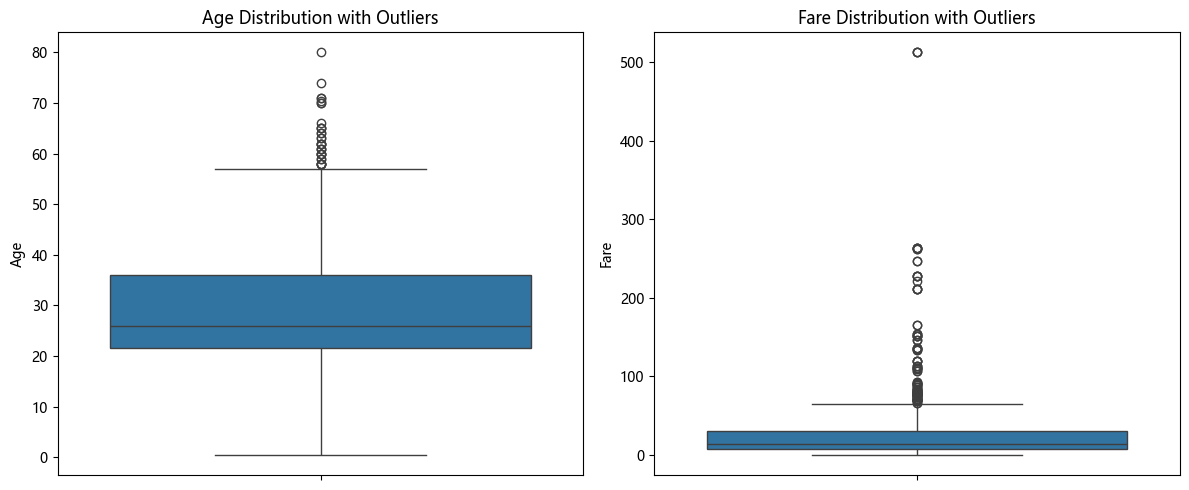

In [12]:
print("\n--- 檢測數值型欄位的異常值 ---")

# 繪製 Age 的箱形圖
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1行2列的第1個圖
sns.boxplot(y=df['Age'])
plt.title('Age Distribution with Outliers')
plt.ylabel('Age')

# 繪製 Fare 的箱形圖
plt.subplot(1, 2, 2) # 1行2列的第2個圖
sns.boxplot(y=df['Fare'])
plt.title('Fare Distribution with Outliers')
plt.ylabel('Fare')

plt.tight_layout() # 自動調整子圖參數，使之填充整個圖像區域
plt.show()

結果分析與決策：
1. **`Age` (年齡):** 箱形圖顯示 `Age` 欄位存在少數極端值，例如非常年幼的乘客（可能不到1歲）和少數高齡乘客。
- **決策：** 這些年齡雖然是極端值，但它們是**真實的乘客數據**，且對於分析生還率可能具有重要意義（例如嬰幼兒的生還率可能更高）。因此，本專案決定**保留這些年齡異常值**，不進行硬性移除或替換，以避免潛在的資訊損失。
2. **`Fare` (票價):** `Fare` 欄位呈現明顯的右偏分佈，並存在大量極端高的值。這些高票價通常代表頭等艙乘客或購買了豪華套房的乘客，這也是**真實數據**。
- **決策：** 為了減少其在統計分析或機器學習模型中過度影響（例如，少數幾個極高票價可能會扭曲平均值或導致模型對其過度敏感），同時也為了使其分佈更接近常態分佈（這對某些統計方法和模型是有利的），我們決定對其進行**對數轉換 (Log Transformation)**。

### 1.2.2 處理欄位[ Fare ]異常值
利用常用的[對數轉換]技術，壓縮數據的範圍（特別是對於右偏分佈的數據），讓數據分佈更接近常態，減少極端值的影響。

hint: 使用 np.log1p() 函數，它計算 log(1+x)，這樣可以安全地處理原始值為 0 的情況（因為 log(0) 是未定義的）。


--- 處理 `Fare` 欄位異常值 (對數轉換) ---
注意：`Fare` 欄位包含 0 值，將使用 `np.log1p` 進行對數轉換以避免計算錯誤。


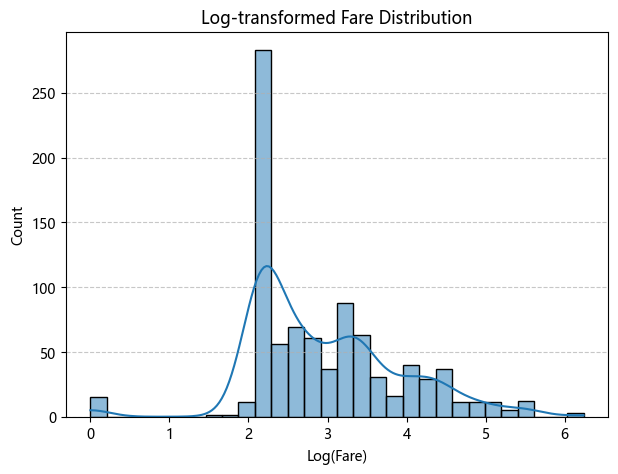

`Fare` 欄位已進行對數轉換，並創建了新的特徵 `Fare_log`。
轉換後的分佈更接近常態分佈，有助於後續的統計分析和機器學習模型。

原始 `Fare` 與 `Fare_log` 欄位對比（前5行）：
      Fare  Fare_log
0   7.2500  2.110213
1  71.2833  4.280593
2   7.9250  2.188856
3  53.1000  3.990834
4   8.0500  2.202765


In [ ]:
print("--- 處理 `Fare` 欄位異常值 (對數轉換) ---")

# 對 Fare 欄位進行對數轉換。
# np.log1p(x) 等於 np.log(1+x)，可以安全處理原始值為 0 的情況。
# 檢查是否有票價為0的，如果有，使用 log1p 更穩妥。
if (df['Fare'] == 0).any():
    print("注意：`Fare` 欄位包含 0 值，將使用 `np.log1p` 進行對數轉換以避免計算錯誤。")
    df['Fare_log'] = np.log1p(df['Fare'])
else:
    df['Fare_log'] = np.log(df['Fare']) # 如果沒有0值，也可以直接使用 np.log

# 繪製對數轉換後的 Fare 分佈，查看效果
plt.figure(figsize=(7, 5))
sns.histplot(df['Fare_log'], kde=True, bins=30) # 增加 bin 數量可以看得更細緻
plt.title('Log-transformed Fare Distribution')
plt.xlabel('Log(Fare)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("`Fare` 欄位已進行對數轉換，並創建了新的特徵 `Fare_log`。")
print("轉換後的分佈更接近常態分佈，有助於後續的統計分析和機器學習模型。")
# 顯示原始 Fare 和轉換後的 Fare_log 的前幾行對比
print("\n原始 `Fare` 與 `Fare_log` 欄位對比（前5行）：")
print(df[['Fare', 'Fare_log']].head())

In [16]:
print("--- 特徵工程：創造家庭人數 (FamilySize) ---")

# FamilySize = SibSp(配偶、兄弟姊妹人數) + Parch(父母、小孩人數) + 1 (包含自己)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("已成功創建 `FamilySize` 欄位。")
print(df[['SibSp', 'Parch', 'FamilySize']].head())

--- 特徵工程：創造家庭人數 (FamilySize) ---
已成功創建 `FamilySize` 欄位。
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
